<a href="https://colab.research.google.com/github/ldcasano/Analisis-DATASET/blob/main/tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np



df = pd.read_csv(r"/content/bank-full.csv", sep=';', na_values='unknown')


df = df.dropna(subset=['poutcome'])
df = df.dropna(subset=['contact'])
df = df.dropna(subset=['education'])

df['poutcome'] = df['poutcome'].map({'success': 1, 'failure': 0, 'other': 2})
df = df[df['poutcome'] != 2]

df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

df['contact'] = df['contact'].map({'cellular': 1, 'telephone': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})


df['default'] = df['default'].map({'yes': 1, 'no': 0})



print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6113 entries, 24060 to 45208
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        6113 non-null   int64 
 1   job        6092 non-null   object
 2   marital    6113 non-null   object
 3   education  6113 non-null   object
 4   default    6113 non-null   int64 
 5   balance    6113 non-null   int64 
 6   housing    6113 non-null   int64 
 7   loan       6113 non-null   int64 
 8   contact    6113 non-null   int64 
 9   day        6113 non-null   int64 
 10  month      6113 non-null   object
 11  duration   6113 non-null   int64 
 12  campaign   6113 non-null   int64 
 13  pdays      6113 non-null   int64 
 14  previous   6113 non-null   int64 
 15  poutcome   6113 non-null   int64 
 16  y          6113 non-null   int64 
dtypes: int64(13), object(4)
memory usage: 859.6+ KB
None
       age         job   marital  education  default  balance  housing  loan  \
24060   33    

In [43]:
columnas_a_normalizar = ['balance', 'pdays','age', 'day', 'duration', 'previous']

for columna in columnas_a_normalizar:
    max_val = df[columna].max()
    if max_val != 0:
        df[columna] = df[columna] / max_val

print(df.head())

            age         job   marital  education  default   balance  housing  \
24060  0.375000      admin.   married   tertiary        0  0.010862        0   
24064  0.375000    services   married  secondary        0  0.042412        1   
24077  0.409091  management   married   tertiary        0  0.000000        1   
24127  0.579545      admin.    single  secondary        0  0.038570        0   
24151  0.375000  unemployed  divorced  secondary        0  0.012376        1   

       loan  contact       day month  duration  campaign     pdays  previous  \
24060     0        0  0.677419   oct  0.017575         1  0.173364  0.054545   
24064     0        0  0.677419   oct  0.064894         1  0.104478  0.072727   
24077     0        0  0.741935   oct  0.063091         1  0.164179  0.054545   
24127     0        0  0.161290   nov  0.202343         1  0.202067  0.018182   
24151     0        0  0.322581   nov  0.078864         1  0.199770  0.036364   

       poutcome  y  
24060         0  

In [45]:
df['job'] = df['job'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes
df['marital'] = df['marital'].astype('category').cat.codes
df['month'] = df['month'].astype('category').cat.codes

df_numeric = df.select_dtypes(include=['number'])

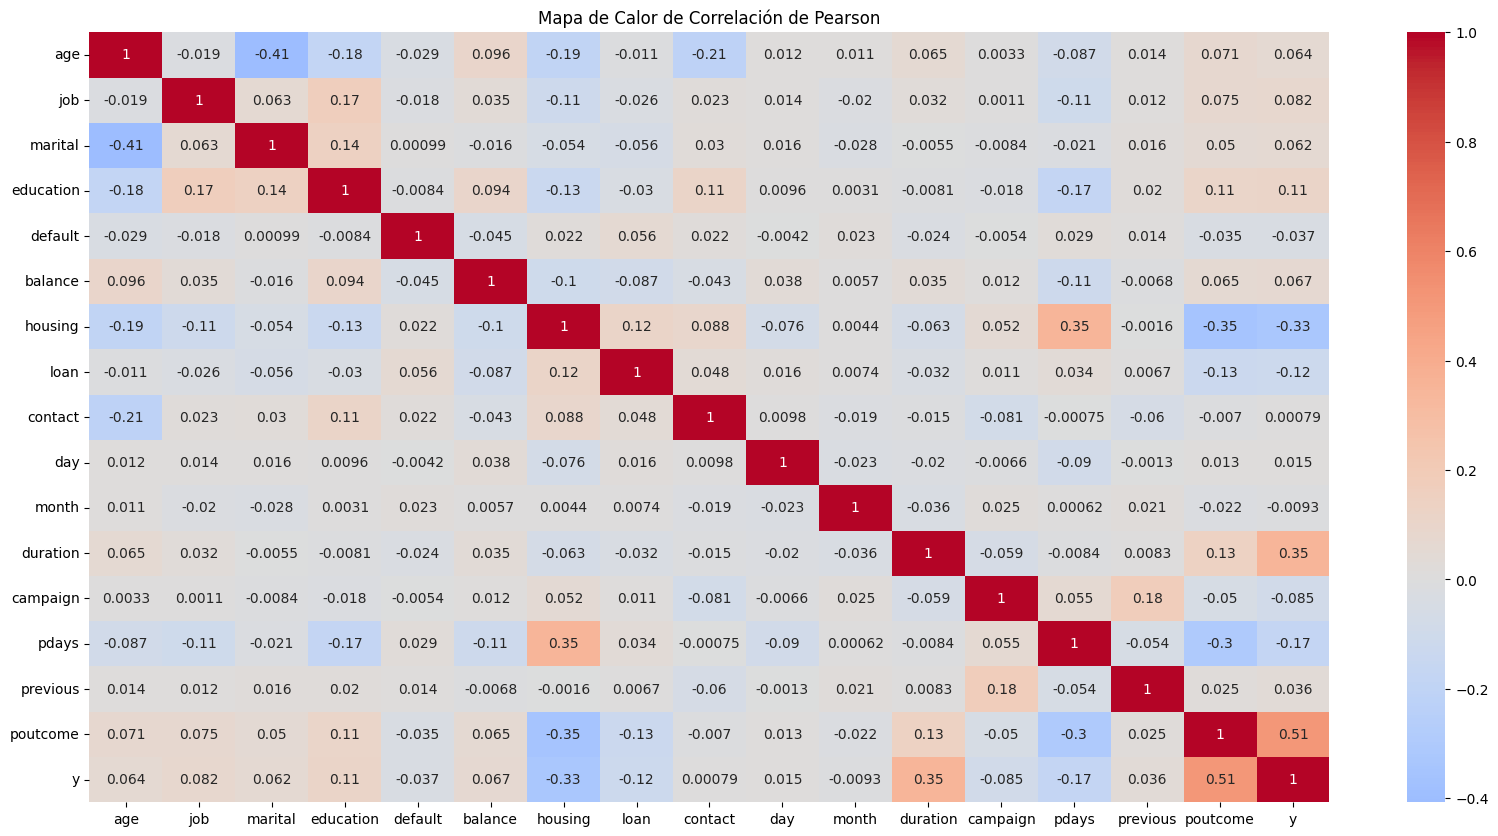

In [46]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

correlacion_pearson = df.corr(method='pearson')



plt.figure(figsize=(20, 10))
sns.heatmap(correlacion_pearson, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlación de Pearson')
plt.show()

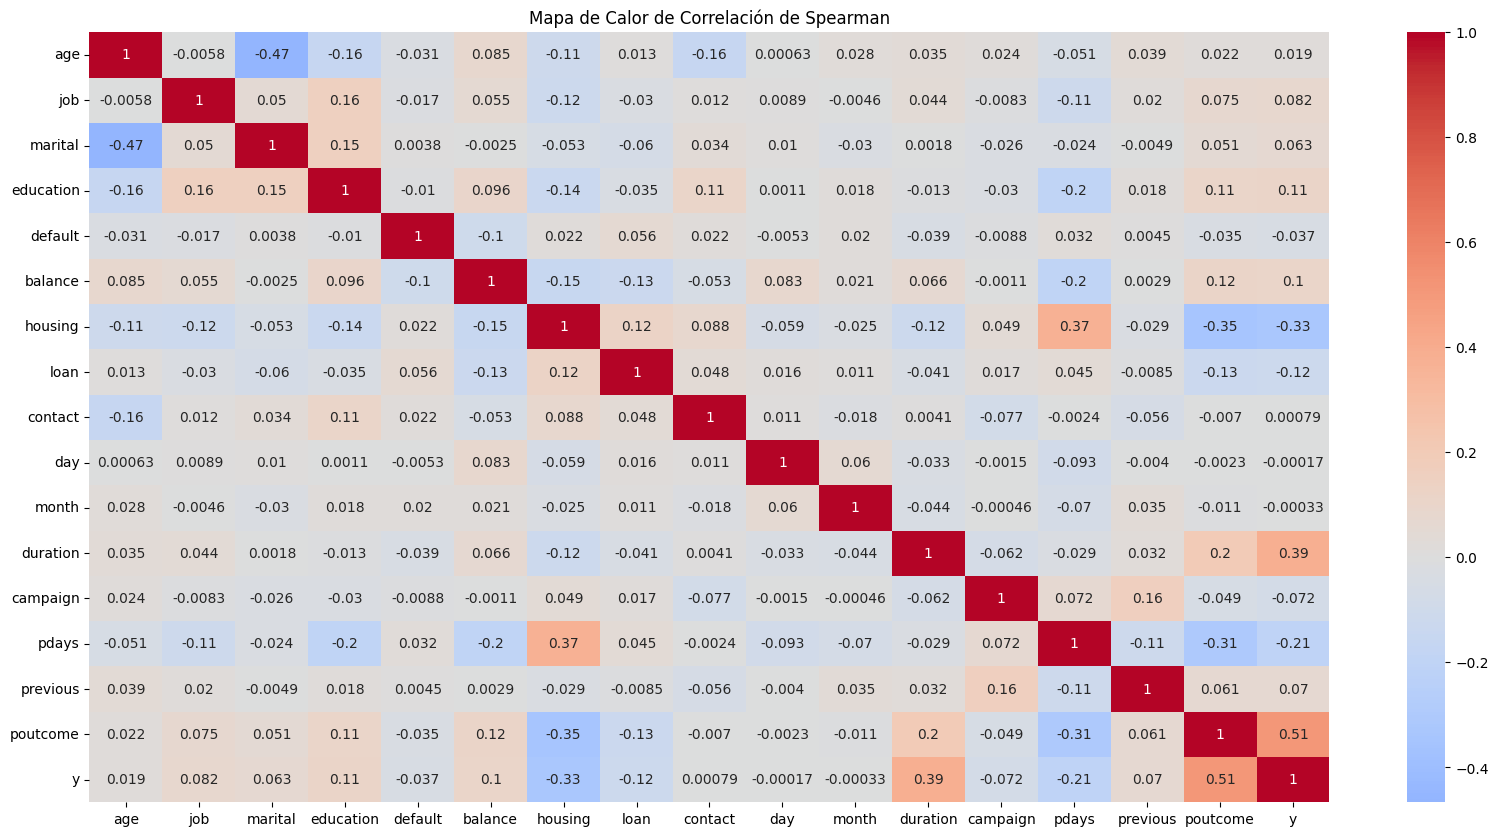

In [47]:
correlacion_spearman = df.corr(method='spearman')

#  Spearman
plt.figure(figsize=(20, 10))
sns.heatmap(correlacion_spearman, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlación de Spearman')
plt.show()

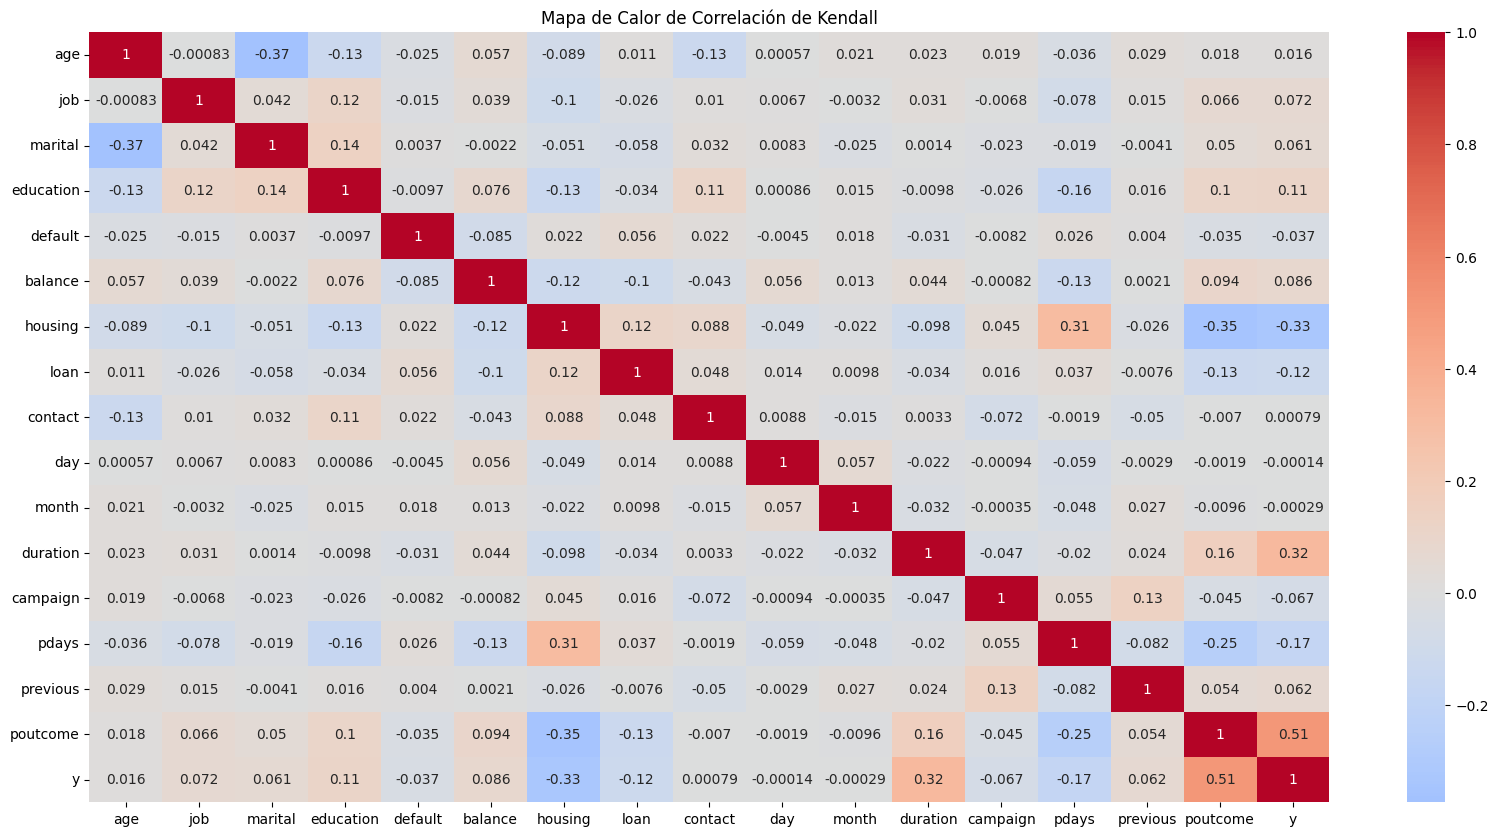

In [48]:
correlacion_kendall = df.corr(method='kendall')

#  Kendall
plt.figure(figsize=(20, 10))
sns.heatmap(correlacion_kendall, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlación de Kendall')
plt.show()

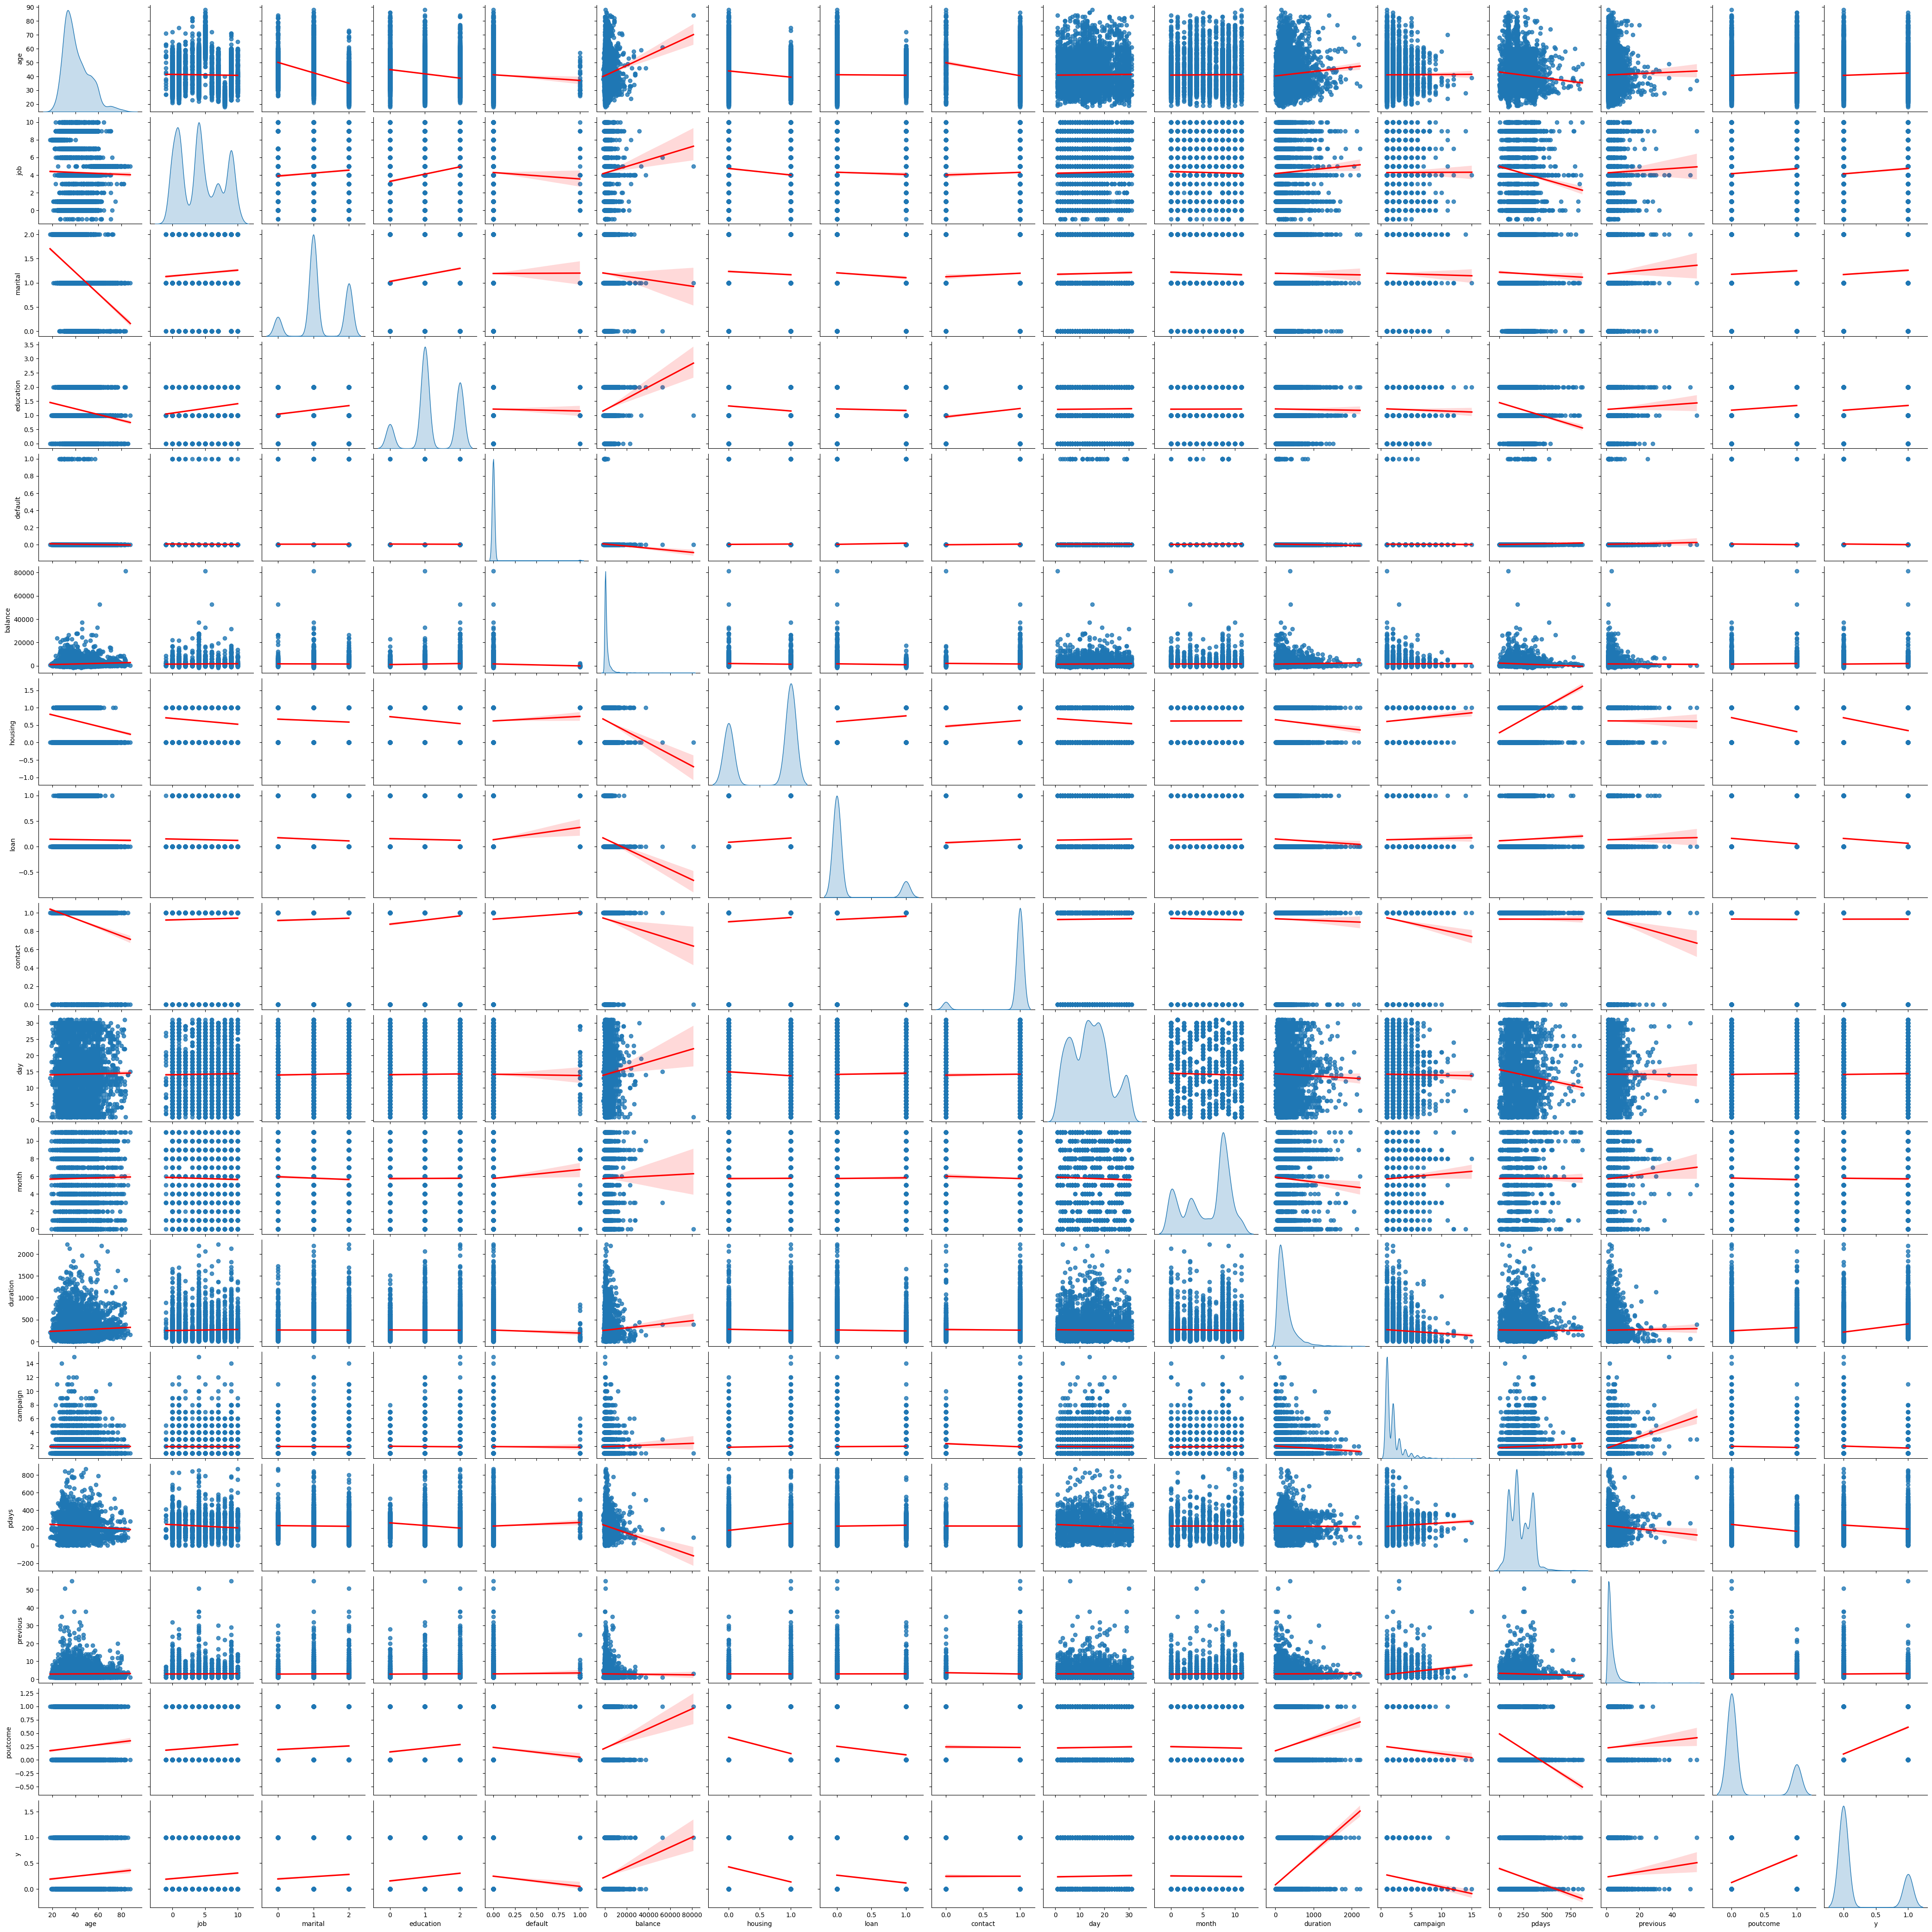

In [39]:
# Crear un pairplot para todas las columnas numéricas del DataFrame
sns.pairplot(df, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.show()

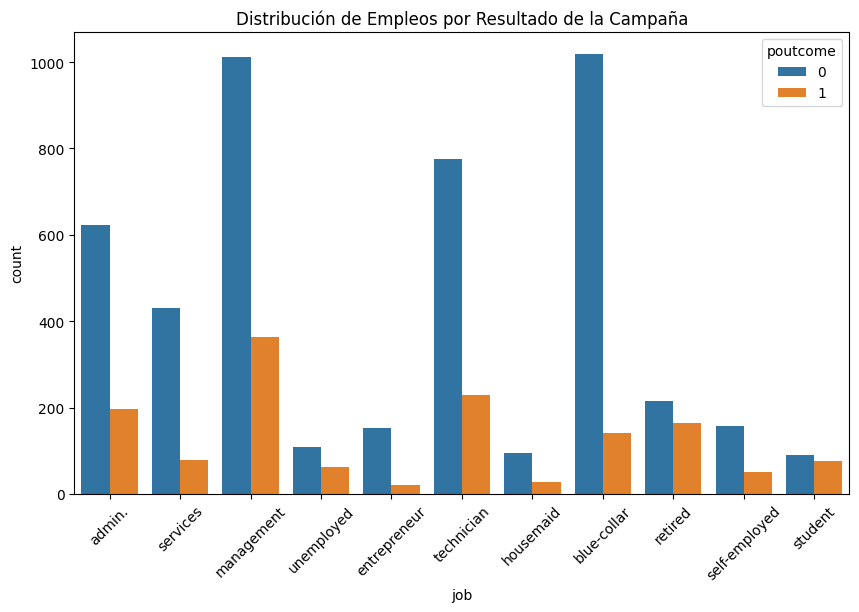

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job', hue='poutcome')
plt.title('Distribución de Empleos por Resultado de la Campaña')
plt.xticks(rotation=45)
plt.show()

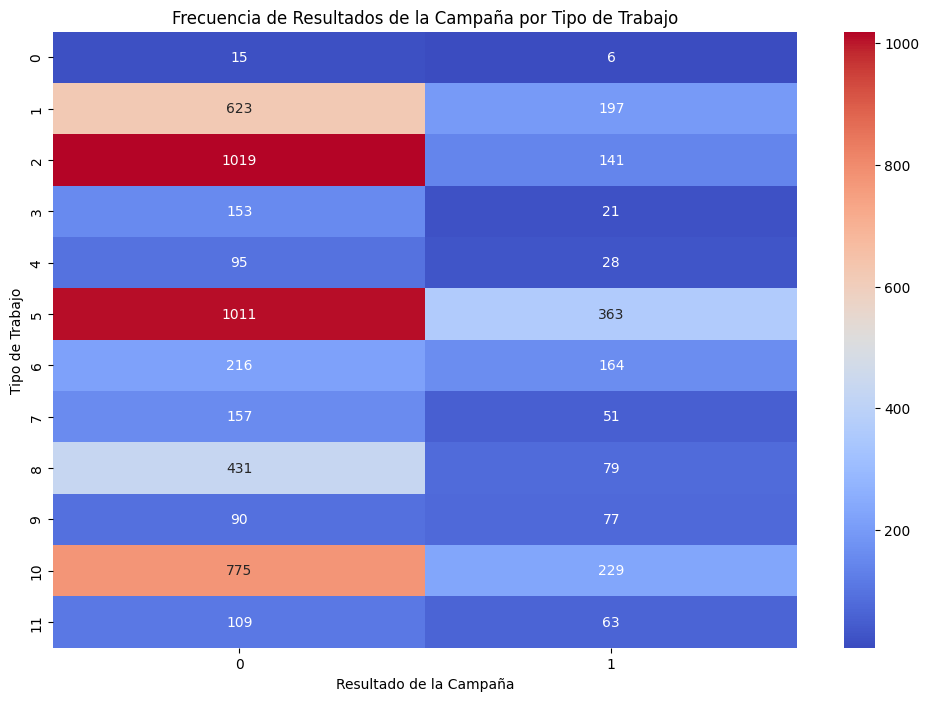

In [6]:
contingency_table = pd.crosstab(df['job'], df['poutcome'])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Frecuencia de Resultados de la Campaña por Tipo de Trabajo')
plt.xlabel('Resultado de la Campaña')
plt.ylabel('Tipo de Trabajo')
plt.show()